## Module Imports

In [65]:
import os
import random
import pandas as pd
import numpy as np
import timeit

import matplotlib.pyplot as plt
import seaborn as sns

# Linear model for PCA
from sklearn.linear_model import LogisticRegression

# Estimation maximization
from sklearn.mixture import GaussianMixture

# Neural Network
from sklearn.neural_network import MLPClassifier

# Clustering Algo
from sklearn.cluster import KMeans

# Principal and indipendent component analysis
from sklearn.decomposition import FastICA, PCA

# Randomized projections
from sklearn.random_projection import GaussianRandomProjection

# Manifolds
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.metrics import silhouette_score as s_score,\
      calinski_harabasz_score as ch_score,\
        homogeneity_completeness_v_measure as hcv_score, adjusted_rand_score as ar_score
from sklearn.metrics import \
    balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import \
    LearningCurveDisplay, validation_curve, learning_curve, train_test_split, ShuffleSplit,\
          GridSearchCV, cross_validate

## Helper Functions

In [52]:
def plot_validation_curve(model, param_grid, x_data, y_data,
                          x_range, param_name, model_name, axs,\
                          plot_train=True, plot_test=True):
    
    train_score, test_score = validation_curve(model, x_data, y_data, 
                                 fit_params=param_grid, scoring='f1_score')
    
    train_mean = train_score.mean(1)
    train_sd = train_score.std(1)
    test_mean = test_score.mean(1)
    test_sd = test_score.std(1)
    axs = axs
    x = x_range
    if plot_train:
        line, = axs.plot(x,train_mean, 'o-')
        axs.fill_between(x,train_mean + train_sd, train_mean - train_sd,alpha=0.3)
    if plot_test:
        axs.plot(x,test_mean,'o-')
        axs.fill_between(x, test_mean + test_sd, test_mean - test_sd,alpha=0.3)
    axs.set_title(f'{model_name} validation curve', fontsize = 15)
    axs.set_xlabel(f'{param_name}', fontsize = 15)
    axs.set_ylabel(f'f1 score', fontsize = 15)
    axs.legend()
    axs.tick_params(axis='both', which='major', labelsize=15)
    axs.tick_params(axis='both', which='minor', labelsize=15)

    return line

In [53]:
def plot_learning_curve(model, param_grid, x_data, y_data,
                          x_range, param_name, model_name, axs,\
                          plot_train=True, plot_test=True):
    
    train_sizes, train_scores, test_scores, fit_times, score_times =\
          learning_curve(model, x_data, y_data,)

    train_mean = train_scores.mean(1)
    train_sd = train_scores.std(1)
    test_mean = test_scores.mean(1)
    test_sd = test_scores.std(1)
    fit_mean = fit_times.mean(1)
    fit_std = fit_times.std(1)
    score_mean = score_times.mean(1)
    score_std = score_times.std(1)

    return None

In [167]:
def perform_kmeans(x_data, y_data, num_runs=1):
    
    r_state = 123456
    num_clusters = np.arange(1,51)
    train_time_dict = {}
    s_score_dict = {}
    ch_score_dict = {}
    v_score_dict = {}
    ar_score_dict = {}

    for i in list(range(num_runs)):

        train_time_lst = []
        s_score_lst = []
        ch_score_lst = []
        v_score_lst = []
        ar_score_lst = []

        for num in num_clusters:
            st = timeit.default_timer()
            k_model = KMeans(random_state=r_state, n_init=10, n_clusters=num).fit(x_data)
            et = timeit.default_timer()
            k_model.fit(x_data, y_data)
            train_time_lst.append(et - st)
            h,c,v = hcv_score(y_data, k_model.labels_)
            v_score_lst.append(v)
            ar_score_lst.append(ar_score(y_data, k_model.labels_))
            ch_score_lst.append(ch_score(y_data, k_model.labels_))
            s_score_lst.append(s_score(y_data, k_model.labels_))
        
        train_time_dict[f'train_iter_{i}'] = train_time_lst
        s_score_dict[f's_score_iter_{i}'] = s_score_lst
        v_score_dict[f'v_score_iter_{i}'] = v_score_lst
        ch_score_dict[f'ch_score_iter_{i}'] = ch_score_lst
        ar_score_dict[f'ar_score_iter_{i}'] = ar_score_lst

    df_time = pd.DataFrameP(train_time_dict)
    df_s_score = pd.DataFrameP(s_score_dict)
    df_v_score = pd.DataFrameP(v_score_dict)
    df_ch_score = pd.DataFrameP(ch_score_dict)
    df_ar_score = pd.DataFrameP(ar_score_dict)

    return df_time, df_s_score, df_v_score, df_ch_score, df_ar_score


In [ ]:
def perform_em(x_data, y_data):
    r_state = 123456
    num_clusters = np.arange(1,51)
    train_time_dict = {}
    s_score_dict = {}
    ch_score_dict = {}
    v_score_dict = {}
    ar_score_dict = {}

    for i in list(range(num_runs)):

        train_time_lst = []
        s_score_lst = []
        ch_score_lst = []
        v_score_lst = []
        ar_score_lst = []

        for num in num_clusters:
            st = timeit.default_timer()
            k_model = KMeans(random_state=r_state, n_init=10, n_clusters=num).fit(x_data)
            et = timeit.default_timer()
            k_model.fit(x_data, y_data)
            train_time_lst.append(et - st)
            h,c,v = hcv_score(y_data, k_model.labels_)
            v_score_lst.append(v)
            ar_score_lst.append(ar_score(y_data, k_model.labels_))
            ch_score_lst.append(ch_score(y_data, k_model.labels_))
            s_score_lst.append(s_score(y_data, k_model.labels_))

    return None

In [165]:
def perform_pca(x_data):

    pca = PCA(whiten=True, svd_solver='full')
    pca.fit(x_data)
    cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    return cum_explained_variance

[]

## Set Random Seed

In [55]:
# set numpy seed
np.random.seed(123321)
# set python seed
random.seed(123321)

## Data Processing

In [56]:
red_wine = os.path.join('data','wine', 'winequality-red.csv')
white_wine = os.path.join('data','wine', 'winequality-white.csv')
turbine = os.path.join('data','turbine','gt_2011.csv')
mushrooms = os.path.join('data','mushroom','secondary_data.csv')

In [57]:
# encoders to use
scale = StandardScaler()
s_split = ShuffleSplit()
ohe = OneHotEncoder(sparse_output=False)

## SHROOM DATA

In [58]:
transformer = make_column_transformer(
    (
        ohe, 
        [
        'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment','gill-spacing', 'gill-color', 
       'stem-root', 'stem-surface', 'stem-color','veil-type', 'veil-color',
        'has-ring', 'ring-type', 'spore-print-color','habitat', 'season'
        ]
        ),
    remainder='passthrough'
    )

In [59]:
shroom_df = pd.read_csv(mushrooms,sep=';').sample(frac=1).reset_index(drop=True)
x = shroom_df.iloc[:,1:].copy()
x_shroom = pd.DataFrame(transformer.fit_transform(x), 
                columns=transformer.get_feature_names_out())
y = shroom_df.iloc[:,0].copy()
y_shroom = (y == 'p')


# reduce the number of training examples
x_shroom = x_shroom[:7000]
y_shroom =  y_shroom[:7000]

# Scale numerical attributes to be b/w 1 and -1
lst_of_num_cols = [
    'remainder__cap-diameter', 'remainder__stem-height', 'remainder__stem-width'
    ]
x_shroom[lst_of_num_cols] = scale.fit_transform(x_shroom[lst_of_num_cols])

## WINE DATA

In [60]:
white_df = pd.read_csv(white_wine, sep=';')
red_df = pd.read_csv(red_wine, sep=';')
white_df['type'] = 0
red_df['type'] = 1
wine_df = pd.concat([white_df,red_df])
wine_df = wine_df.sample(frac=1).reset_index(drop=True)

In [61]:
# set x and y values
# remove 'quality' and 'type' column from x array
x_wine = wine_df.iloc[:,:-2].copy()
# scale x vals
x_wine.values[:,:] = scale.fit_transform(x_wine)
# set y array equal to 'type' column 
y_wine = wine_df.iloc[:,-1].copy()

## Shroom and Wine Train/Test Split

In [62]:
x_shroom_train, x_shroom_test, y_shroom_train, y_shroom_test = train_test_split(x_shroom, y_shroom, test_size=0.2)

In [63]:
x_wine_train, x_wine_test, y_wine_train, y_wine_test = train_test_split(x_wine, y_wine, test_size=0.2)

## Model Instantiation

In [155]:
r_state = 123456

# Expectation Maximization: Clustering
gmx = GaussianMixture(random_state=r_state)

# Kmeans: Clustering
km = KMeans(random_state=r_state, n_init=10, n_clusters=2)

# Manifold: Dimension Reduction
lle = LocallyLinearEmbedding(random_state=r_state)

# Look at distribution of Eigenvalues or explained variance
# Dimension Reduction
pca = PCA(random_state=r_state)

# Use kurtosisfor performance eval
# Dimension Reduction
ica = FastICA(random_state=r_state)

# Use reconstruction error
grp = GaussianRandomProjection(compute_inverse_components=True,random_state=r_state)

# Neural network, use f1 score
# Wine Params: {'activation': 'relu', 'hidden_layer_sizes': (100,), 
#               'learning_rate': 'constant', 'learning_rate_init': 0.89, 'solver': 'sgd'}
# Shroom Params: {'activation': 'relu', 'hidden_layer_sizes': (100,),
#                'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
mlp = MLPClassifier(random_state=r_state)

In [156]:
km.fit(x_shroom, y_shroom)

KMeans(n_clusters=2, n_init=10, random_state=123456)

In [158]:
km.cluster_centers_.shape

(2, 128)

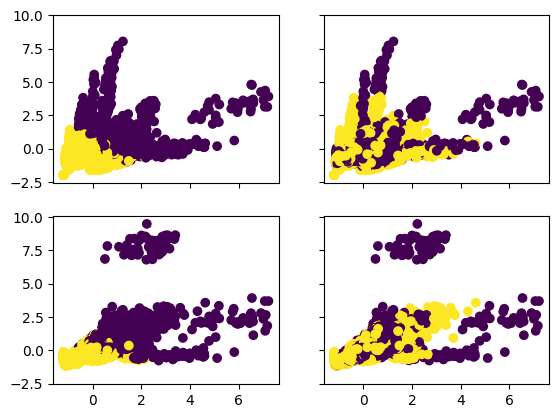

In [163]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)
ax = ax.flatten()
ax[0].scatter(x_shroom.iloc[:,-1], x_shroom.iloc[:,-2], c=km.labels_)
ax[1].scatter(x_shroom.iloc[:,-1], x_shroom.iloc[:,-2], c=y_shroom)
ax[2].scatter(x_shroom.iloc[:,-1], x_shroom.iloc[:,-3], c=km.labels_)
ax[3].scatter(x_shroom.iloc[:,-1], x_shroom.iloc[:,-3], c=y_shroom)
plt.show()

## Clustering

In [24]:
gmx_param_grid = {'n_components':np.arange(1,51),
                  'covariance_type': ['full','tied','diag','spherical']                             
                  }

km_param_grid = {'n_clusters':np.arange(1,51),
                  'algorithm': ['lloyd','elkan','full']                             
                  }

pca_param_grid = {'n_components':np.arange(1,51),
                 'svd_solver': ['full', 'arpack', 'randomized']
                 }

ica_param_grid = {'n_components':np.arange(1,51),
                 'algorithm': ['parallel', 'deflation']
                 }

grp_param_grid = {'n_components':np.arange(1,51)}


mlp_param_grid = {
                'learning_rate': ["constant"],
                'hidden_layer_sizes': [(1,),(10,),(20,),(50,),(70,),(100,)],
                'learning_rate_init': np.linspace(0.01, 1, 10),
                'activation': ['relu'],
                'solver': ['sgd']
                }


## Wine: Clustering

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("pca", pca), ("logistic", logistic)])

param_grid = {
    "pca__n_components": np.arange(1, (x_shroom.shape[1]+1)),
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(x_shroom, y_shroom)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.875):
{'logistic__C': 10000.0, 'pca__n_components': 99}


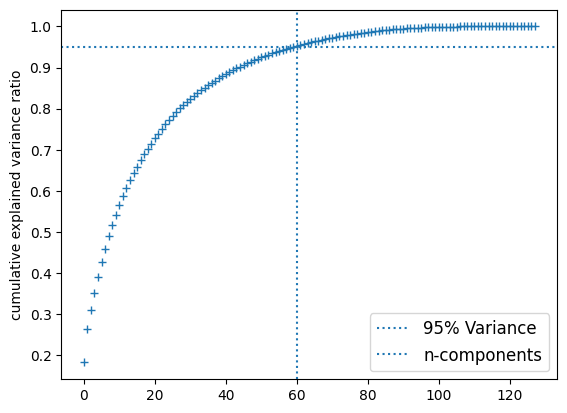

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Plot the PCA spectrum
pca.fit(x_shroom)
cumsum = np.cumsum(pca.explained_variance_ratio_)
fig, ax0 = plt.subplots()
ax0.plot(cumsum, "+", linewidth=2)
ax0.set_ylabel("cumulative explained variance ratio")

ax0.axhline(
    0.95,
    linestyle=":",
    label="95% Variance",
)
ax0.axvline(
    60,
    linestyle=":",
    label="n-components",
)
ax0.legend(prop=dict(size=12))
plt.show()

In [18]:
# Neural Network hyper tuning
# defining parameter range 
param_grid = {
'learning_rate': ['constant'],
'hidden_layer_sizes': [(1,),(10,),(20,),(50,),(70,),(100,)],
'learning_rate_init': np.linspace(0.01, 1, 10),
'activation': ['relu'],
'solver': ['sgd']
}

grid = GridSearchCV(mlp, param_grid, scoring='f1', refit = True,\
                     verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(x_wine_train, y_wine_train) 
 
# print best parameter after tuning 
print(grid.best_params_)
mlp_wine = grid.best_estimator_
# grid_predictions = grid.predict(x_wine_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.89, 'solver': 'sgd'}


## Shrooms: Hyperparameter Tuning 

In [23]:
# Neural Network hyper tuning
# defining parameter range 
param_grid = {
'learning_rate': ["constant"],
'hidden_layer_sizes': [(1,),(10,),(20,),(50,),(70,),(100,)],
'learning_rate_init': np.linspace(0.01, 1, 10),
'activation': ['relu'],
'solver': ['sgd']
}

grid = GridSearchCV(mlp, param_grid, scoring='f1',\
                     refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(x_shroom_train, y_shroom_train) 
 
# print best parameter after tuning 
print(grid.best_params_)
mlp_shroom = grid.best_estimator_
# grid_predictions = grid.predict(x_shroom_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}


c:\Users\lboad\py_venv\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
